In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

In [2]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .05
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .99
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,4


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [3]:
#Get 1x1 degree grid
with xr.open_dataset('../rawdata/rsl_85_2090.nc') as ds:
    lon = ds['x'].values
    lat = ds['y'].values
    slr_md = ds['slr_md'].values

In [4]:
def get_rcov(scen,var1,var2):
    with xr.open_dataset(f'../data/climrcov_{scen}.nc') as ds:
        rcov = ds[f'{var1}_{var2}'].values
    return rcov

In [5]:
cmap = plt.get_cmap('cmo.delta',16)

In [6]:
vars1 = ['stdn','stdn','stdn','stdn','glac','glac','glac','gsmb','gsmb','asmb']
vars2 = ['glac','gsmb','asmb','adyn','gsmb','asmb','adyn','asmb','adyn','adyn']
ns = [1,5,9,13,6,10,14,11,15,16]
ylab = ['glaciers','Gr. SMB','Ant. SMB','Ant. dyn.','','','','','','']
xlab = ['','','','sterodynamic','','','glaciers','','Greenland SMB','Antarctic SMB']

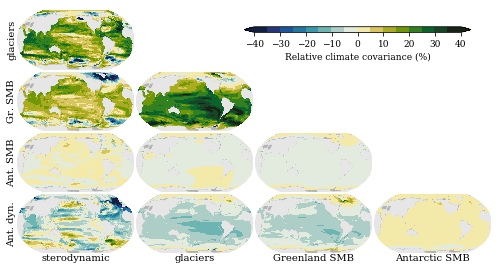

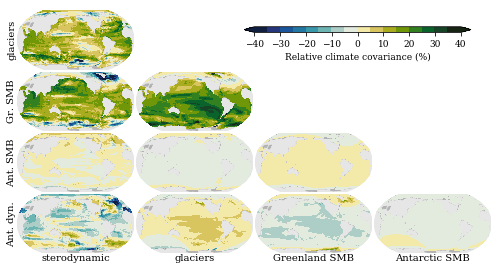

In [7]:
for scen in ['rcp45','rcp85']:
    fig = plt.figure()
    
    for v,var1 in enumerate(vars1):
        var2 = vars2[v]
        n = ns[v]
        rcov = get_rcov(scen,var1,var2)
        
        ax = fig.add_subplot(4,4,n,projection=ccrs.Robinson(central_longitude=200))
        im = ax.pcolormesh(lon,lat,rcov,transform=ccrs.PlateCarree(),vmin=-40,vmax=40,cmap=cmap)
        ax.text(-.01,.5,ylab[v],transform=ax.transAxes,rotation='vertical',va='bottom',ha='center',rotation_mode='anchor')
        ax.text(.5,-.01,xlab[v],transform=ax.transAxes,va='top',ha='center')
        ax.set_global()
        ax.add_feature(cfeature.LAND,color=cols['land'])
        ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
        ax.outline_patch.set_visible(False)
        
    cax = fig.add_axes([.5,.82,.45,.02])
    cb = plt.colorbar(im,cax=cax,orientation='horizontal',extend='both')
    cb.set_label('Relative climate covariance (%)')

    figname = f'draftplot_climrcov_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()